[A Comprehensive Guide To Visualizing and Analyzing DICOM Images in Python](https://medium.com/@hengloose/a-comprehensive-starter-guide-to-visualizing-and-analyzing-dicom-images-in-python-7a8430fcb7ed)

In [23]:
import workflow.dicom_workflow as workflow
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

In [24]:
#os.environ["dicom_path"] = "C:/ntpu_project/LIDC-IDRI/"

In [25]:
#workflow.get_directory()

In [26]:
#workflow.dicom_directory

In [27]:
os.environ["dicom_path"] = "C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/"

In [28]:
workflow.run()

reading total...1/1 patient folders
Worker 1: C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/01-01-2000-CT THORAX WCONTRAST-94040/2-CHEST-06815/
C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/01-01-2000-CT THORAX WCONTRAST-94040/2-CHEST-06815/087.xml
reading total...50/133 patient DICOMs
reading total...100/133 patient DICOMs
reading total...133/133 patient DICOMs
same result!!!!!!!!!!!
same result!!!!!!!!!!!
1.3.6.1.4.1.14519.5.2.1.6279.6001.193715981207740465635852316394 nodule_type NODULE_GREATER_THAN_3MM
same result!!!!!!!!!!!
same result!!!!!!!!!!!
same result!!!!!!!!!!!
same result!!!!!!!!!!!
same result!!!!!!!!!!!
same result!!!!!!!!!!!
1.3.6.1.4.1.14519.5.2.1.6279.6001.456127109393489787435570763700 distance >= 5, (382.58677685950414, 249.27272727272728) & (378.97435897435895, 254.74358974358975)
has_only_one_result
same result!!!!!!!!!!!
1.3.6.1.4.1.14519.5.2.1.6279.6001.271598078776433645837246573410 nodule_type NODULE_GREATER_THAN_3MM
same result!!!!!!!!!!!
same result!!!!!!!!!!!
1.3.6.

In [29]:
len(workflow.mapped_ct_dicom_list)

24

In [30]:
same_count = 0
for i, dicom in enumerate(workflow.mapped_ct_dicom_list):
    same_count += dicom.is_same_examination_result
    if dicom.is_same_examination_result:
        print(i)
print(f'same_count = {same_count}')

0
1
3
4
5
6
7
8
11
13
14
16
18
19
20
21
22
23
same_count = 18


In [199]:
dicom = workflow.mapped_ct_dicom_list[0]
image = copy.deepcopy(dicom.pixel_array)
nodule_list = dicom.nodule_list
#for nodule in nodule_list:
#    print([edge for edge in nodule.edge_map_list])
print(f'is same result = {dicom.is_same_examination_result}')
print(f'rescale_slope = {dicom.rescale_slope}')
print(f'rescale_intercept = {dicom.rescale_intercept}')

is same result = True
rescale_slope = 1
rescale_intercept = -1024


In [32]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import randn
import time

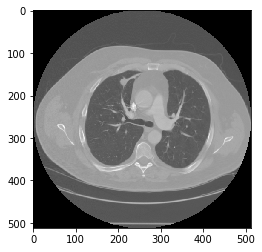

2193
-1024
2193
-1024


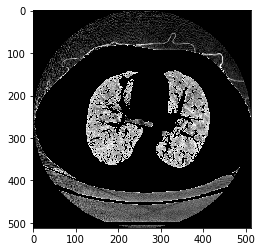

2193
-1024


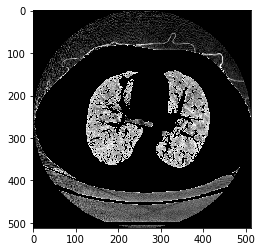

2193
-1024


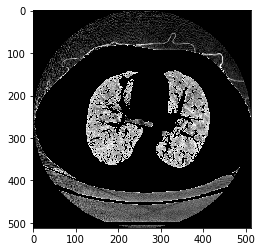

2193
-1024


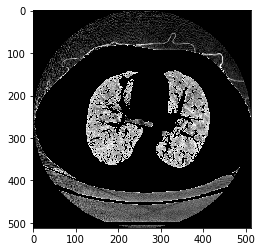

In [195]:
# 將診斷為 nodule edge 的周遭用 1024 (黑) 去圈起來
size = len(dicom.nodule_list)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()
temp_pixel_array = None
print(np.max(image))
print(np.min(image))
for i, nodule in enumerate(dicom.nodule_list):
    # print(f'{0 if (i/2)<1 else 1}, {(i%2)}')
    temp_pixel_array = copy.deepcopy(image)
    print(np.max(temp_pixel_array))
    print(np.min(temp_pixel_array))
    #dicom.pixel_array[dicom.pixel_array == -1024] = 1024
    #temp_pixel_array = copy.deepcopy(dicom.pixel_array)
    temp_pixel_array[temp_pixel_array == -1024] = 0
    temp_pixel_array[temp_pixel_array > 200] = 0
    temp_pixel_array[temp_pixel_array < -700] = 0
    #for edge in nodule.edge_map_list:
    #    #print(f'int(edge.x) = {int(edge.x)}, int(edge.y) = {int(edge.y)}')
    #    temp_pixel_array[int(edge.y), int(edge.x)] = 1024
    #plt.imshow(dicom.pixel_array, cmap=plt.cm.gray)
    plt.imshow(temp_pixel_array, cmap=plt.cm.gray)
    plt.show()

In [193]:
print(dicom.full_path)
print(dicom.pixel_array[:300])
print(image.min())
print(image.max())

C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/01-01-2000-CT THORAX WCONTRAST-94040/2-CHEST-06815/000009.dcm
[[-1024 -1024 -1024 ... -1024 -1024 -1024]
 [-1024 -1024 -1024 ... -1024 -1024 -1024]
 [-1024 -1024 -1024 ... -1024 -1024 -1024]
 ...
 [-1024 -1024 -1024 ... -1024 -1024 -1024]
 [-1024 -1024 -1024 ... -1024 -1024 -1024]
 [-1024 -1024 -1024 ... -1024 -1024 -1024]]
-1024
2193


In [14]:
from scipy.ndimage import filters
import tensorflow as tf
import cv2

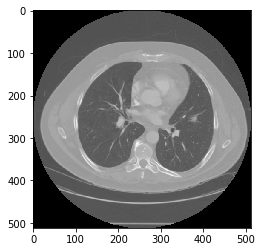

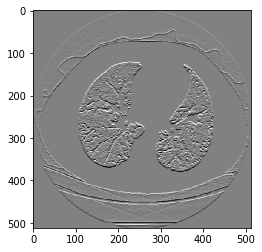

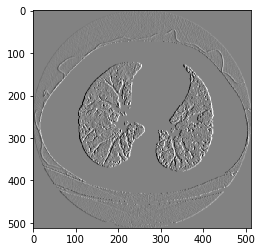

In [143]:
### kernel_size = 5
 
# 使用numpy建立 5*5且值為1/(5**2)的矩陣作為kernel。
 
kernel_x = np.array([
    [-1, -4, -6, -4, -1],
    [-2, -8, -12, -8, -2],
    [0, 0, 0, 0, 0],
    [2, 8, 12, 8, 2],
    [1, 4, 6, 4, 1],
])

kernel_y = np.array([
    [1, 2, 0, -2, -1],
    [4, 8, 0, -8, -4],
    [6, 12, 0, -12, -6],
    [4, 8, 0, -8, -4],
    [1, 2, 0, -2, -1],
    
])
 
# 使用cv2.filter2D進行convolute，
 
result_x = cv2.filter2D(temp_pixel_array, ddepth=-1 , dst=-1, kernel=kernel_x, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
result_y = cv2.filter2D(temp_pixel_array, -1 , kernel_y)
 
# cv2.imshow("Filter", result)
# cv2.imshow("Original", image)
 

plt.imshow(image, cmap=plt.cm.gray)
plt.show()
plt.imshow(result_x, cmap=plt.cm.gray)
plt.show()
temp_y = copy.deepcopy(result_y)
plt.imshow(temp_y, cmap=plt.cm.gray)
plt.show()

In [149]:
print(np.max(temp_y))
print(np.min(temp_y))

8764
-9163


In [148]:
print(np.max(image))
print(np.min(image))

2196
-1024


In [197]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.rescale_intercept
    slope = medical_image.rescale_slope
    hu_image = image * slope + intercept

    return hu_image

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

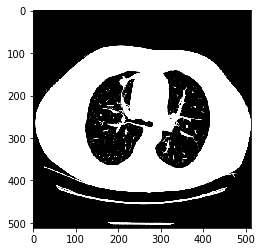

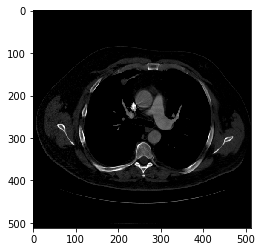

In [214]:
dicom = workflow.mapped_ct_dicom_list[0]
hu_image = transform_to_hu(dicom, dicom.pixel_array)
lung_image = window_image(hu_image, -700, 200)
bone_image = window_image(hu_image, 400, 1000)
plt.imshow(lung_image, cmap=plt.cm.gray)
plt.show()
plt.imshow(bone_image, cmap=plt.cm.gray)
plt.show()